In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

### import dataset
1. Since data is in form of csv file we have to use pandas read_csv to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.
3. Check whether any null values are there or not. if it is present then following can be done,
 - Imputing data using Imputation method in sklearn
 - Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
train_data.tail()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39160,39161,2021-12-31,2,5,NaN,2019-08-11,1,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
train_data.shape

(39161, 19)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
# Statistical visualization
train_data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
# check missing value in dataset
train_data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [8]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
products_purchased,20911,0.533975
signup_date,15113,0.385920
id,0,0.000000
user_activity_var_6,0,0.000000
user_activity_var_12,0,0.000000
user_activity_var_11,0,0.000000
user_activity_var_10,0,0.000000
user_activity_var_9,0,0.000000
user_activity_var_8,0,0.000000
user_activity_var_7,0,0.000000


In [9]:
# products_purchased
train_data['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [10]:
train_data['products_purchased'] = train_data['products_purchased'].fillna(0)

In [11]:
# People has signup or not, if people has signup then that kinds of people may be from indirect sale 
# and who did not signup that person may be of direct sale, i am imputing those record with 0 and 1
train_data['signup'] = train_data['signup_date'].notnull().astype(int)

In [12]:
#dropping signup_date from dateset
train_data = train_data.drop(['signup_date'], axis = 1)

In [13]:
train_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup
0,1,2021-01-01,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,2,2021-01-01,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,3,2021-01-01,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2021-01-01,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2021-01-01,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [14]:
train_data.shape

(39161, 19)

In [15]:
#change data type of created_at feture
train_data[['created_at']] = train_data[['created_at']].apply(pd.to_datetime)

In [16]:
# max and min date in dataset
print(train_data['created_at'].min(),"-",train_data['created_at'].max())

2021-01-01 00:00:00 - 2021-12-31 00:00:00


In [17]:
train_data['Lead_created_date'] = pd.to_datetime(train_data.created_at, format="%d/%m/%Y").dt.day

In [18]:
train_data['Lead_created_month'] = pd.to_datetime(train_data.created_at, format="%d/%m/%Y").dt.month

In [19]:
# Since we have converted create_at column into integers, Now we can drop as it is of no use.
train_data.drop(['created_at'],axis =1, inplace =True)

In [20]:
train_data.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup,Lead_created_date,Lead_created_month
0,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1
1,2,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1
2,3,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,4,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,5,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    39161 non-null  float64
 4   user_activity_var_1   39161 non-null  int64  
 5   user_activity_var_2   39161 non-null  int64  
 6   user_activity_var_3   39161 non-null  int64  
 7   user_activity_var_4   39161 non-null  int64  
 8   user_activity_var_5   39161 non-null  int64  
 9   user_activity_var_6   39161 non-null  int64  
 10  user_activity_var_7   39161 non-null  int64  
 11  user_activity_var_8   39161 non-null  int64  
 12  user_activity_var_9   39161 non-null  int64  
 13  user_activity_var_10  39161 non-null  int64  
 14  user_activity_var_11  39161 non-null  int64  
 15  user_activity_var_1

In [22]:
train_data['signup'].value_counts()

1    24048
0    15113
Name: signup, dtype: int64

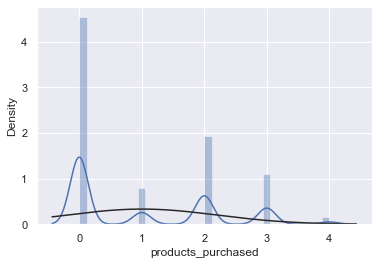

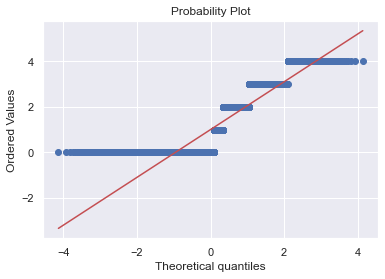

In [23]:
#histogram and normal probability plot
sns.distplot(train_data['products_purchased'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['products_purchased'], plot=plt)

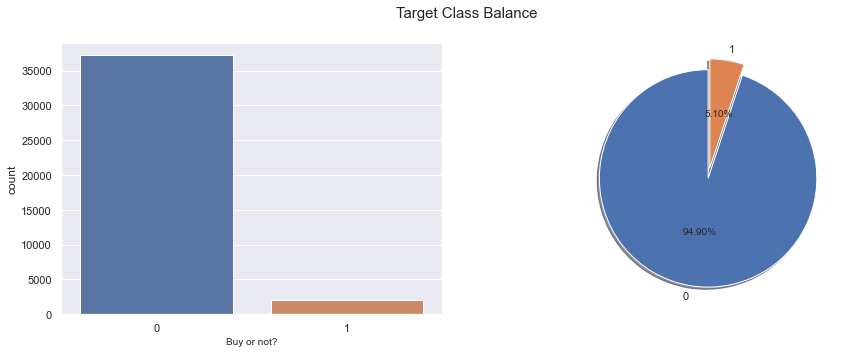

In [24]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 2, 1)
sns.countplot(train_data['buy'],)

plt.xlabel('Buy or not?', fontsize = 10)

plt.subplot(1, 2, 2)
train_data['buy'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

# Outlier detection

In [25]:
def detect_outliers(data):
    outliers =[]
    threshold =3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [53]:
for i in range(1,20):
    outliers_pt =detect_outliers(train_data[train_data.columns[i]])
    print("Total outliers present in ",train_data.columns[i], "=", len(outliers_pt))
    print(outliers_pt)

Total outliers present in  campaign_var_1 = 0
[]
Total outliers present in  campaign_var_2 = 24
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
Total outliers present in  products_purchased = 0
[]
Total outliers present in  user_activity_var_1 = 375
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

Total outliers present in  Lead_created_date = 0
[]
Total outliers present in  Lead_created_month = 0
[]


<AxesSubplot:xlabel='campaign_var_1'>

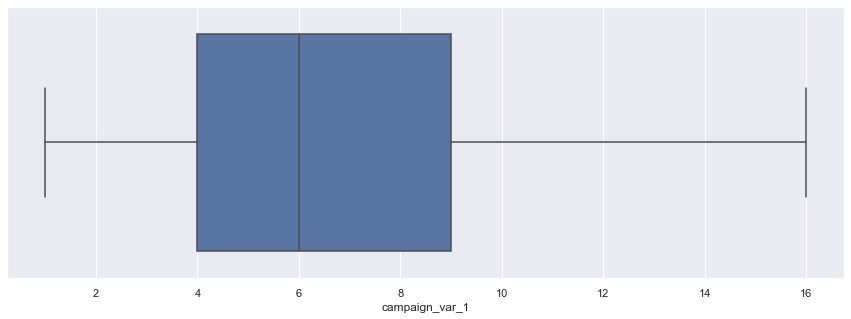

In [54]:
sns.boxplot(train_data['campaign_var_1'])

<AxesSubplot:xlabel='campaign_var_2'>

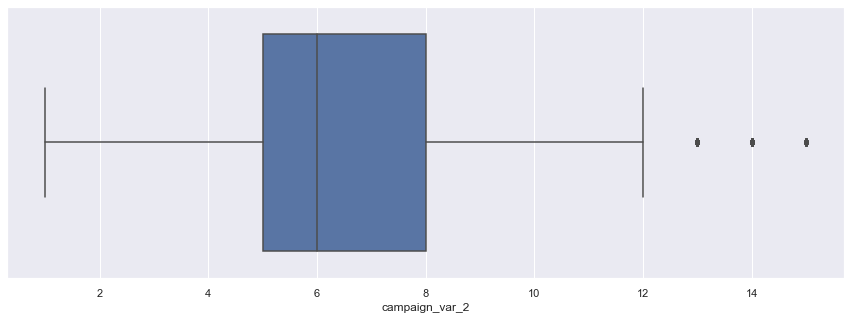

In [55]:
sns.boxplot(train_data['campaign_var_2'])

<AxesSubplot:xlabel='products_purchased'>

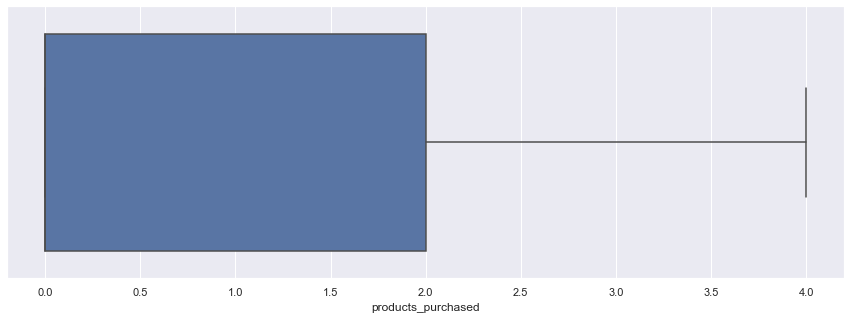

In [56]:
sns.boxplot(train_data['products_purchased'])

<AxesSubplot:xlabel='user_activity_var_1'>

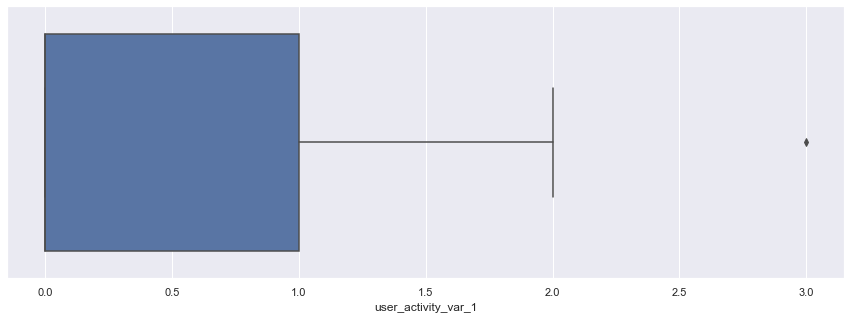

In [57]:
sns.boxplot(train_data['user_activity_var_1'])

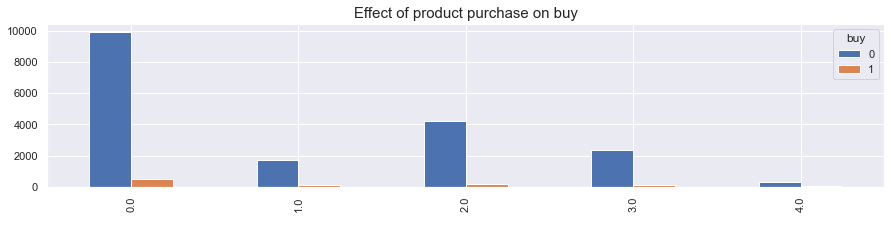

In [58]:
# Lets compare the product purchased in the buy

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train_data['products_purchased'], train_data['buy'])
x.div(x.count(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of product purchase on buy', fontsize = 15)
plt.xlabel(' ')
plt.show()

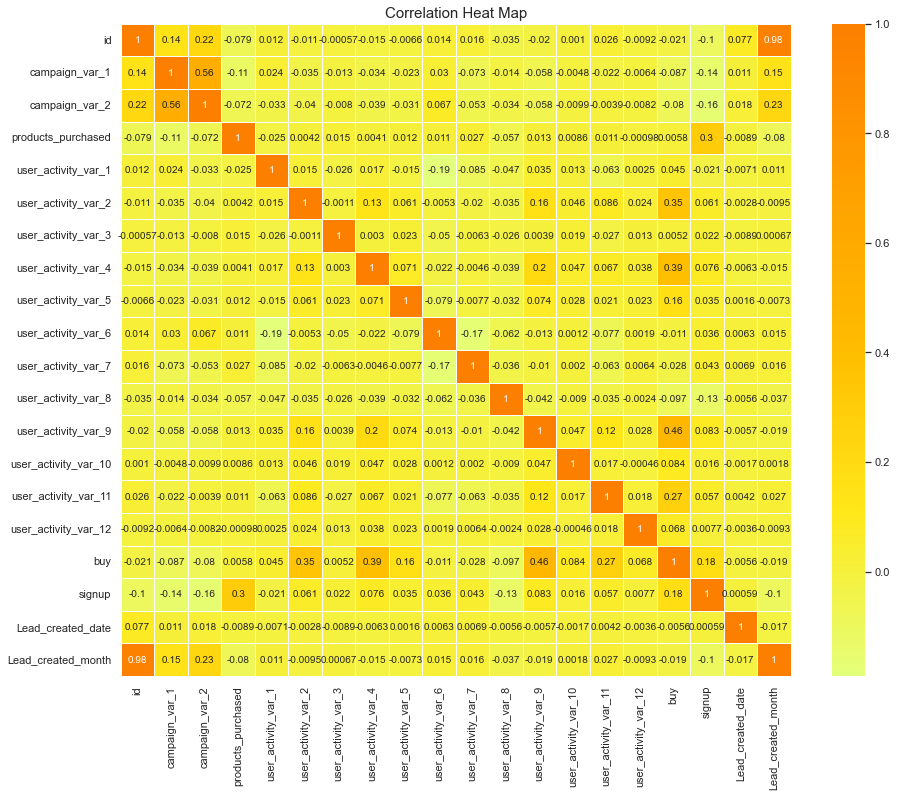

In [59]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(train_data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Prepare test dataset

In [60]:
test_data = pd.read_csv('test_data.csv')

In [61]:
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Product purchased null data fill with 0
test_data['products_purchased'] = test_data['products_purchased'].fillna(0)

# People has signup or not, if people has signup then that kinds of people may be from indirect sale 
# and who did not signup that person may be of direct sale, i am imputing those record with 0 and 1
test_data['signup'] = test_data['signup_date'].notnull().astype(int)

#dropping signup_date from dateset
test_data = test_data.drop(['signup_date'], axis = 1)

#change data type of created_at feture
test_data[['created_at']] = test_data[['created_at']].apply(pd.to_datetime)

# max and min date in dataset
print(test_data['created_at'].min(),"-",test_data['created_at'].max())

#change created_at into lead_creatd_date and lead_created_month
test_data['Lead_created_date'] = pd.to_datetime(test_data.created_at, format="%d/%m/%Y").dt.day
test_data['Lead_created_month'] = pd.to_datetime(test_data.created_at, format="%d/%m/%Y").dt.month

# Since we have converted create_at column into integers, Now we can drop as it is of no use.
test_data.drop(['created_at'],axis =1, inplace =True)

test_data.head()

2022-01-01 00:00:00 - 2022-03-30 00:00:00


,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup,Lead_created_date,Lead_created_month
0,39162,2,2,0.0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1
1,39163,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
2,39164,8,7,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1
3,39165,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,1,1,1
4,39166,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [63]:
# id features is not important for model , so we can drop it from both data set
train_data = train_data.drop(['id'],axis=1)
test_data = test_data.drop(['id'],axis=1)

## Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

In [64]:
# lets split the target data from the train data

# spliting data into target variable
x_data = train_data.drop(['buy'],axis =1)
y_data = train_data['buy']

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_data,y_data)

ExtraTreesClassifier()

In [66]:
print(model.feature_importances_)

[0.07965425 0.07597839 0.03541849 0.0164437  0.09401023 0.00885773
 0.1222515  0.02489642 0.02407261 0.01120055 0.00713397 0.17522751
 0.00393557 0.10167181 0.00328908 0.02311337 0.1123818  0.08046303]


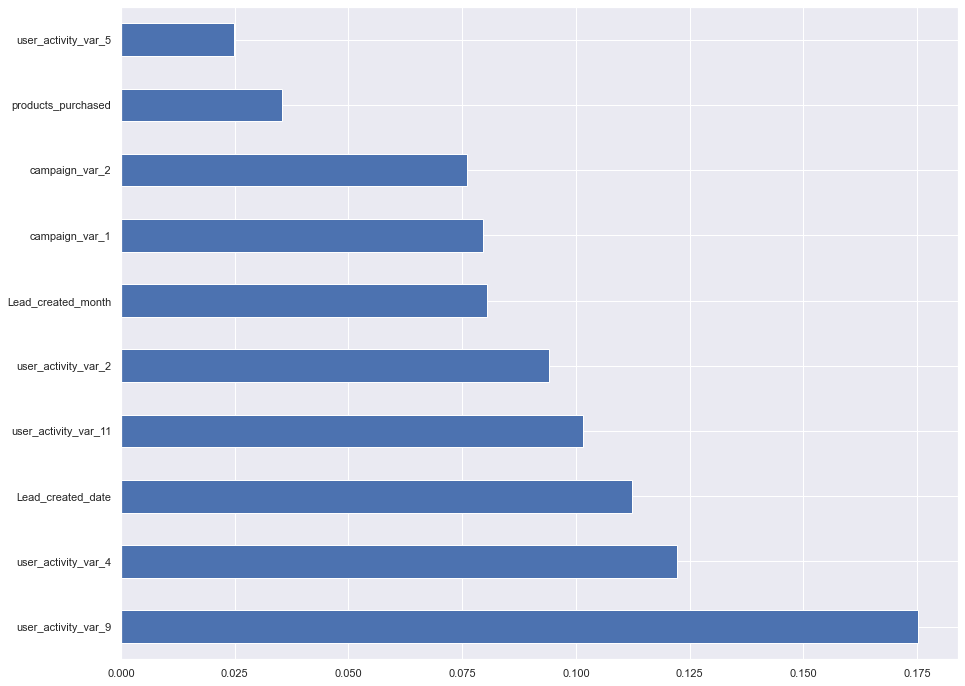

In [67]:
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling. 
* We will not use Under Sampling to avoid data loss.

In [68]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [69]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x_data, y_data.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(74326, 18)
(74326,)


In [70]:
data_test = test_data
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x test :", x_test.shape)
print("Shape of the y test :", y_test.shape)
print("Shape of the Data Test :", data_test.shape)

Shape of the x Train : (59460, 18)
Shape of the y Train : (59460,)
Shape of the x test : (14866, 18)
Shape of the y test : (14866,)
Shape of the Data Test : (13184, 18)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.33, random_state=42)

# Model Buiding

In [72]:
clf = xgb.XGBClassifier( n_estimators=600, eta=0.01, learning_rate=0.05, max_depth=8, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f1_score(y_test, pred)

[11:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9327869511068257

In [73]:
clf = xgb.XGBClassifier(n_estimators=600, eta=0.01, learning_rate=0.05, max_depth=8, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1)
clf.fit(x_data, y_data)
pred = clf.predict(test_data)

[11:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [74]:
#GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier


def GradientBoostingClassifier_model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':
        
        
        gb = GradientBoostingClassifier()
        
        parameters = {'learning_rate': [0.01],
                      'max_depth': [5],
                      'min_samples_leaf': [16],
                      'max_features': [1.0],
                      'n_estimators': [200]}
        
        estimator = GridSearchCV(gb,n_jobs=-1,param_grid=parameters)
        
        estimator.fit(X_train, y_train)
        
        prediction_test_gb=estimator.predict(X_test)
        prediction_train_gb=estimator.predict(X_train)
        
        best_params = estimator.best_params_
                                 
        validation_accuracy_test = f1_score(y_test, prediction_test_gb)
        validation_accuracy_train = f1_score(y_train, prediction_train_gb)
        
        print('Validation accuracy_test: ', validation_accuracy_test)
        print('Validation accuracy_train: ', validation_accuracy_train)
        
        from sklearn.metrics import confusion_matrix

        cm = confusion_matrix(y_test, prediction_test_gb)
        plt.rcParams['figure.figsize'] = (3, 3)
        sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.show()
        
        print(best_params)

Validation accuracy_test:  0.8622229123801389
Validation accuracy_train:  0.8634190020766256


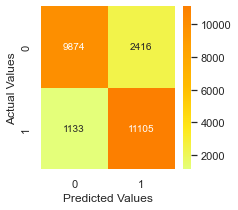

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 16, 'n_estimators': 200}


In [75]:
GradientBoostingClassifier_model(X_train, X_test, y_train, y_test)

In [76]:
#GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
        
        
gb = GradientBoostingClassifier()

parameters = {'learning_rate': [0.01],
              'max_depth': [5],
              'min_samples_leaf': [16],
              'max_features': [1.0],
              'n_estimators': [200]}

estimator = GridSearchCV(gb,n_jobs=-1,param_grid=parameters)

estimator.fit(x_data, y_data)

prediction_test_gb=estimator.predict(test_data)

In [77]:
print(prediction_test_gb.shape)
submission = pd.read_csv("sample_submission.csv")
submission["buy"].shape

(13184,)


(13184,)

In [78]:
submission["buy"]=prediction_test_gb
submission.to_csv("sample_submission3.csv", index=False)

In [79]:
submission.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
